In [ ]:
!pip install pyteomics matplotlib

In [3]:
import os

# Extract the filename from the FTP URL
ftp_url = "ftp://ftp.pride.ebi.ac.uk/pride/data/archive/2024/08/PXD053207/JL112922_120622_Epc1_D.mzXML"
mzxml_file = ftp_url.split('/')[-1]

# Check if the file already exists in Colab's /content/ directory
if os.path.isfile(mzxml_file):
    print(f"✅ File already exists: {mzxml_file}")
else:
    print(f"⬇️ Downloading file: {mzxml_file}")
    # Download the file with wget
    !wget $ftp_url

⬇️ Downloading file: JL112922_120622_Epc1_D.mzXML
--2025-07-04 01:31:58--  ftp://ftp.pride.ebi.ac.uk/pride/data/archive/2024/08/PXD053207/JL112922_120622_Epc1_D.mzXML
           => ‘JL112922_120622_Epc1_D.mzXML’
Resolving ftp.pride.ebi.ac.uk (ftp.pride.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.pride.ebi.ac.uk (ftp.pride.ebi.ac.uk)|193.62.193.165|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pride/data/archive/2024/08/PXD053207 ... done.
==> SIZE JL112922_120622_Epc1_D.mzXML ... 319546356
==> PASV ... done.    ==> RETR JL112922_120622_Epc1_D.mzXML ... done.
Length: 319546356 (305M) (unauthoritative)

JL112922_120622_Epc 100%[===================>] 304.74M  11.2MB/s    in 41s     

2025-07-04 01:32:42 (7.37 MB/s) - ‘JL112922_120622_Epc1_D.mzXML’ saved [319546356]



### 3. Extract TIC from the .mzXML file
Using pyteomics, we read the raw MS data, extract retention times and total ion currents, and store them for visualization.


In [4]:
import matplotlib.pyplot as plt
from pyteomics import mzxml

#mzxml_file = ftp_url.split('/')[-1]

tic_times = []
tic_intensities = []

with mzxml.MzXML(mzxml_file) as reader:
    for spectrum in reader:
        if spectrum['msLevel'] == 1: # process MS1 spectrum (precursor survey)
            rt = spectrum['retentionTime']
            minutes = float(rt) / 60.0
            intensity = sum(spectrum['intensity array'])
            tic_times.append(minutes)
            tic_intensities.append(intensity)


### 4. Plot TIC
We plot the total ion current over retention time as a quick indicator of LC-MS run quality.


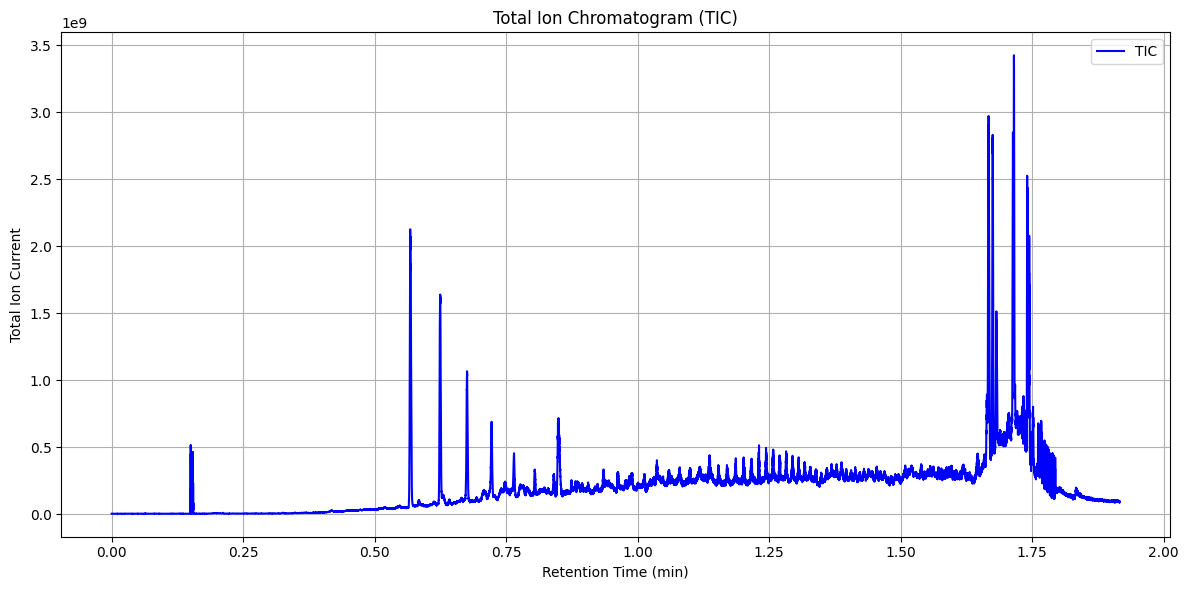

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(tic_times, tic_intensities, color='blue', label='TIC')
plt.xlabel('Retention Time (min)')
plt.ylabel('Total Ion Current')
plt.title('Total Ion Chromatogram (TIC)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('TIC_plot.png')
plt.show()


In [6]:
with mzxml.MzXML(mzxml_file) as reader:
    first_spectrum = next(reader)  # get the first spectrum
    print("Features in first spectrum:", list(first_spectrum.keys()))


Features in first spectrum: ['num', 'msLevel', 'peaksCount', 'polarity', 'scanType', 'filterLine', 'retentionTime', 'lowMz', 'highMz', 'basePeakMz', 'basePeakIntensity', 'totIonCurrent', 'id', 'm/z array', 'intensity array']


Here's a breakdown of some key-value pairs in the first_spectrum dictionary, which represent the structure of the data for that spectrum:

*   '**num**': The scan number.  
*   '**msLevel**': The MS level (e.g., 1 for MS1, 2 for MS2).
*   '**retentionTime**': The retention time for the spectrum.  
*   '**m/z array**': An array of mass-to-charge values.  
*   '**intensity array**': An array of intensity values  corresponding to the m/z values.  
*   '**totIonCurrent**': The total ion current for the spectrum.


In [ ]:
first_spectrum['retentionTime']

0.0010856901333333334 minute

In [7]:
with mzxml.MzXML(mzxml_file) as reader:
    num_spectra = sum(1 for _ in reader)
    print(f"Total spectra in this file: {num_spectra}")


Total spectra in this file: 36826


In [8]:
first_spectrum

{'num': '1',
 'msLevel': 1,
 'peaksCount': 279,
 'polarity': '+',
 'scanType': 'CID',
 'filterLine': 'FTMS + p NSI Full ms [400.0000-1500.0000]',
 'retentionTime': 0.0010856901333333334 minute,
 'lowMz': 402.180267333984,
 'highMz': 1378.22875976563,
 'basePeakMz': 445.120391845703,
 'basePeakIntensity': 245401.484375,
 'totIonCurrent': 3050861.0,
 'id': '1',
 'm/z array': array([ 402.18027,  403.18066,  403.30658,  404.92252,  405.30136,
         405.84842,  408.90298,  409.1107 ,  410.11282,  411.8993 ,
         413.26627,  419.31586,  420.32385,  426.13693,  426.87952,
         427.1392 ,  427.37973,  428.88895,  429.08908,  430.09036,
         430.88895,  431.0878 ,  432.08887,  432.88388,  433.33383,
         441.2975 ,  443.14087,  444.1401 ,  445.1204 ,  446.12115,
         447.11884,  447.34628,  447.9119 ,  448.11835,  448.35   ,
         449.11658,  450.85025,  459.17245,  460.17325,  461.16998,
         462.147  ,  462.18222,  463.14716,  464.14447,  465.14566,
         466.

In [9]:
first_spectrum['retentionTime']

0.0010856901333333334 minute

In [11]:
mz_array = first_spectrum['m/z array']
intensity_array = first_spectrum['intensity array']

print("First 10 m/z values:", mz_array[:10])
print("First 10 intensity values:", intensity_array[:10])

First 10 m/z values: [402.18027 403.18066 403.30658 404.92252 405.30136 405.84842 408.90298
 409.1107  410.11282 411.8993 ]
First 10 intensity values: [10394.511   6086.527   2917.4504  3479.767   3175.6013  2536.173
  3092.434  23702.238   8595.844   3435.5762]
